<a href="https://colab.research.google.com/github/alwinvargh/new/blob/main/data_sci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss

In [20]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()


,df,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,jk
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,9046
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,51676
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,31112
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,60182
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1665


In [21]:
print(df.columns)


Index(['df', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'jk'],
      dtype='object')


In [22]:
df.drop('df', axis=1, inplace=True)


In [19]:
print(df.columns)


Index(['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke'],
      dtype='object')


In [23]:
df.describe()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,jk
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728,36517.829354
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320,21161.721625
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,67.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000,17741.250000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000,36932.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000,54682.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,72940.000000


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
 11  jk                 5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [25]:
df['age'].astype(int)


,age
0,67
1,61
2,80
3,49
4,79
...,...
5105,80
5106,81
5107,35
5108,51


In [28]:
df.isnull().sum()


,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [30]:
#replacing the missing values with the most frequent value
df['bmi'].fillna(df['bmi'].mode()[0], inplace=True)

<ipython-input-30-ba9f48b18358>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mode()[0], inplace=True)


In [31]:
print(df['ever_married'].value_counts())
print(df['work_type'].value_counts())
print(df['gender'].value_counts())
print(df['Residence_type'].value_counts())
print(df['smoking_status'].value_counts())


ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [32]:
df['ever_married'].replace({'Yes':1, 'No':0}, inplace=True)
df['gender'].replace({'Male':1, 'Female':0,'Other':2}, inplace=True)
df['Residence_type'].replace({'Urban':1, 'Rural':0}, inplace=True)
df['smoking_status'].replace({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3}, inplace=True)
df['work_type'].replace({'Private':0, 'Self-employed':1, 'children':2, 'Govt_job':3, 'Never_worked':4}, inplace=True)


<ipython-input-32-93626c79bbd4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ever_married'].replace({'Yes':1, 'No':0}, inplace=True)
<ipython-input-32-93626c79bbd4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ever_married'].replace({'Yes':1, 'No':0}, inplace=True)
<ipython-input-32-

<Axes: >

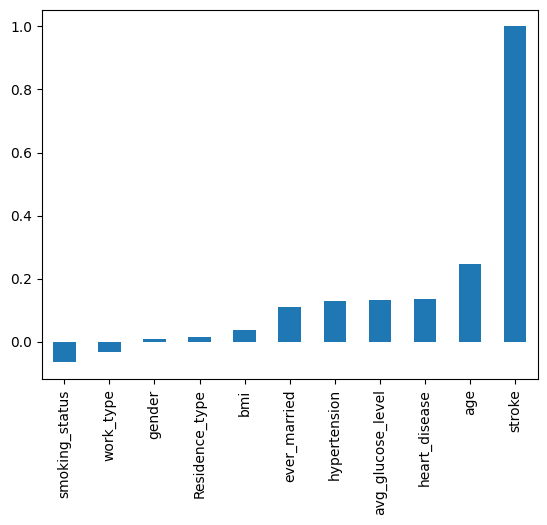

In [33]:
df.corr()['stroke'][:-1].sort_values().plot(kind='bar')


<Axes: >

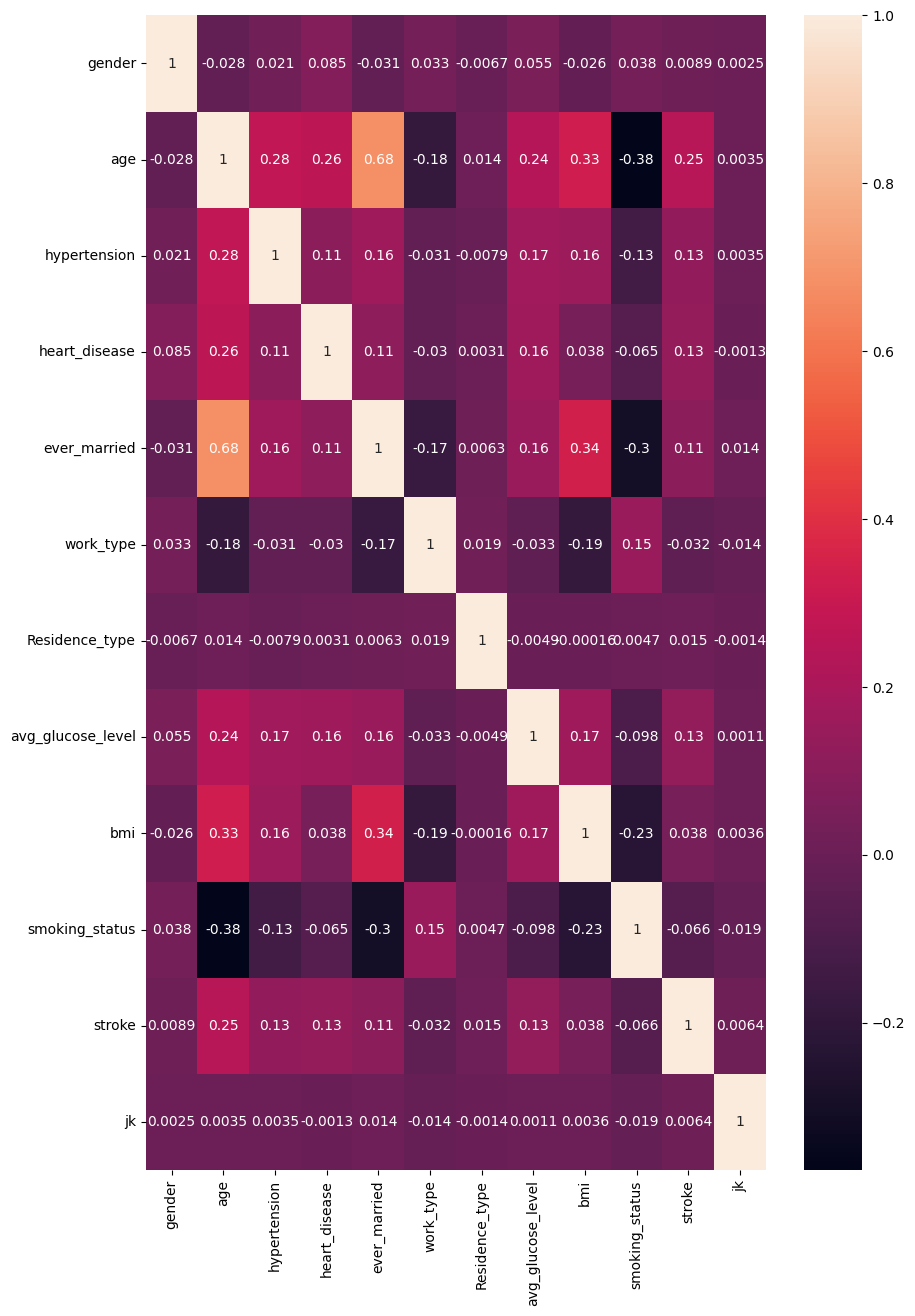

In [37]:
plt.figure(figsize=(10,15))
sns.heatmap(df.corr(), annot=True)

In [38]:
# replace age with number wrt to age group
# 0 = 0-12 , 1 = 13-19 , 2 = 20-30 , 3 = 31-60 , 4 = 61-100
df['age'] = pd.cut(x=df['age'], bins=[0, 12, 19, 30, 60, 100], labels=[0, 1, 2, 3,4])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,jk
0,1,4,0,1,1,0,1,228.69,36.6,0,1,9046
1,0,4,0,0,1,1,0,202.21,28.7,1,1,51676
2,1,4,0,1,1,0,0,105.92,32.5,1,1,31112
3,0,3,0,0,1,0,1,171.23,34.4,2,1,60182
4,0,4,1,0,1,1,0,174.12,24.0,1,1,1665


<Axes: xlabel='gender', ylabel='count'>

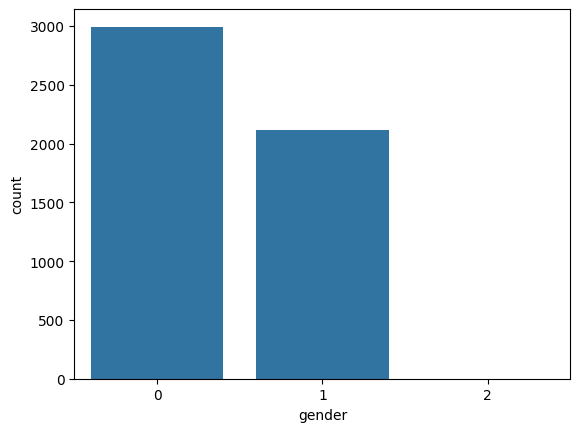

In [39]:
sns.countplot(x = 'gender', data = df)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Axes: xlabel='Residence_type', ylabel='count'>

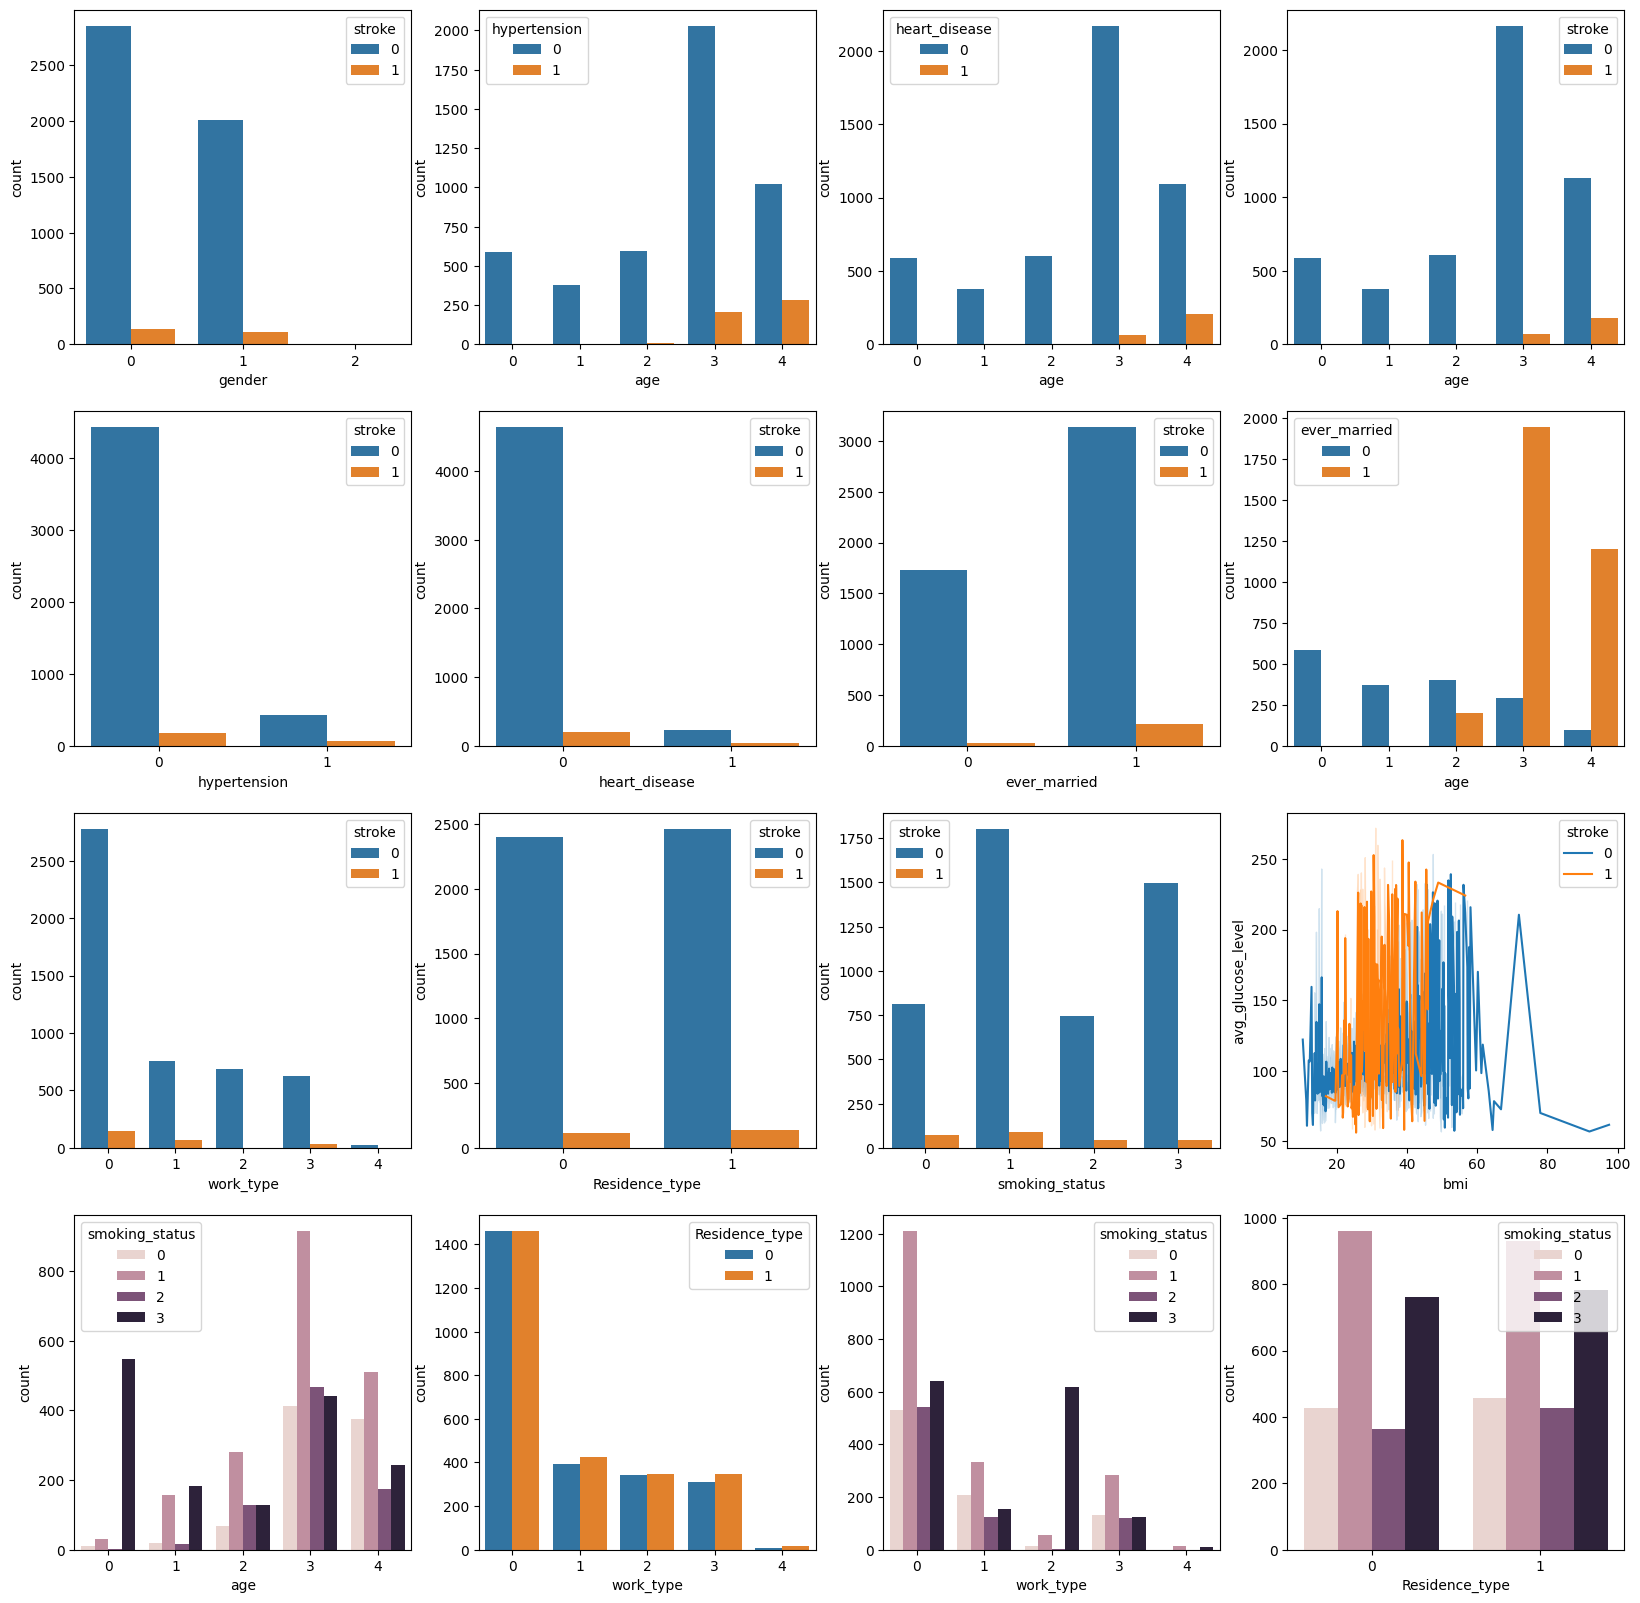

In [40]:
fig, ax = plt.subplots(4,4,figsize=(20, 20))
sns.countplot(x = 'gender', data = df,hue = 'stroke', ax=ax[0,0])
sns.countplot(x = 'age', data = df,hue = 'hypertension', ax=ax[0,1])
sns.countplot(x = 'age', data = df,hue = 'heart_disease', ax=ax[0,2])
sns.countplot(x = 'age', data = df,hue = 'stroke', ax=ax[0,3])
sns.countplot(x = 'hypertension', data = df,hue = 'stroke', ax=ax[1,0])
sns.countplot(x = 'heart_disease', data = df,hue = 'stroke', ax=ax[1,1])
sns.countplot(x = 'ever_married', data = df,hue = 'stroke', ax=ax[1,2])
sns.countplot(x = 'age', data = df,hue = 'ever_married', ax=ax[1,3])
sns.countplot(x = 'work_type', data = df,hue = 'stroke', ax=ax[2,0])
sns.countplot(x = 'Residence_type', data = df,hue = 'stroke', ax=ax[2,1])
sns.countplot(x = 'smoking_status', data = df,hue = 'stroke', ax=ax[2,2])
sns.lineplot(x = 'bmi', y = 'avg_glucose_level', data = df,hue = 'stroke', ax=ax[2,3])
sns.countplot(x = 'age', data = df,hue = 'smoking_status', ax=ax[3,0])
sns.countplot( x = 'work_type', data = df,hue = 'Residence_type', ax=ax[3,1])
sns.countplot(x = 'work_type', data = df,hue = 'smoking_status', ax=ax[3,2])
sns.countplot(x = 'Residence_type', data = df,hue = 'smoking_status', ax=ax[3,3])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('stroke', axis=1), df['stroke'], test_size=0.2, random_state=42)


In [43]:
lr = LogisticRegression()
lr

LogisticRegression()

In [44]:

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9393346379647749

In [45]:
lr_pred = lr.predict(X_test)
accuracy_score(y_test, lr_pred)

0.9393346379647749

In [46]:
from sklearn.svm import SVC
svm = SVC()
svm

SVC()

In [47]:
svm.fit(X_train, y_train)
svm.score(X_test, y_test)


0.9393346379647749

In [48]:

sv_pred = svm.predict(X_test)
accuracy_score(y_test, sv_pred)

0.9393346379647749

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [51]:
dt.fit(X_train, y_train)
dt.score(X_test, y_test)


0.8884540117416829

In [52]:

dt_pred = dt.predict(X_test)
accuracy_score(y_test, dt_pred)

0.8884540117416829

In [53]:
knn = KNeighborsClassifier()
knn


KNeighborsClassifier()

In [54]:

knn.fit(X_train, y_train)
knn.score(X_test, y_test)


0.9393346379647749

In [55]:

#testing the model
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.9393346379647749